In [ ]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [ ]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

최대우도추정

https://ratsgo.github.io/statistics/2017/09/23/MLE/

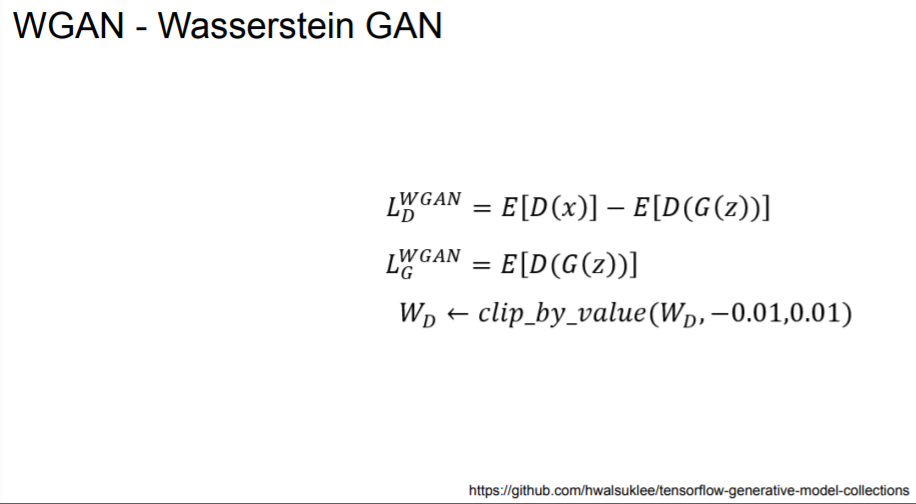

tensorflow-generative-model-collections

https://github.com/hwalsuklee/tensorflow-generative-model-collections

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        01-1. Autoencoder

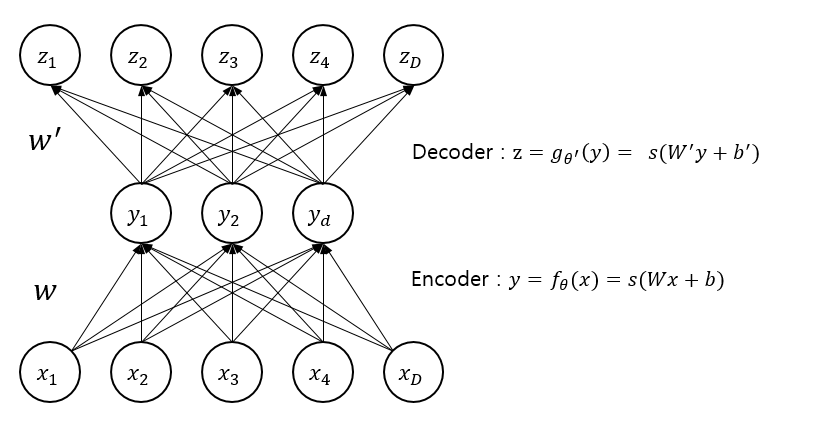

p.1267 정리하기

Autoencoder(Unsupervised learning)

    - 이상탐지(anomaly detection)을 위해 많이 사용됨
    - dimension reduction 기법
    - PCA 기법과 유사
    - (ex) iris 데이터의 경우 auto encoder를 통해 군집 분포를 찍을 수 있음
    - 통계가 아닌 다른 부분에서는 데이터를 압축해서 보내는 기법
    - 데이터의 효율적인 인코딩을 찾는 방법으로서, 데이터 압축 및 복원을 위해
      사용될 수 있다.
    
    pre-training (DNN의 예비훈련을 위함이다, overfit을 피하기 위함)
    fine-tunning
    
    class의 size가 unbalanced 할 때 -> 스모트?포스트래핑?
    위의 문제로 요즘은 Generator를 많이 사용
    SVM은 one class classification에서 강하다.
    reconstruction error -> anomaly detection
    
RBM (Restrict Bolztman Machine) 찾아서 참고하기 (이 대체 기법이 오토인코더)

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        01-2. Sparse Autoencoder

최적화 p.1269 (식 마저 적기)

$$ Minimize\quad \frac{1}{N} \sum_{n=1}^N L(x(n), \hat{x}(n)) + \lambda (||W^1||^2 + ||W^2||^2 ) + \beta \sum_{j=1}^m KL(p|| \hat{p_j} )$$
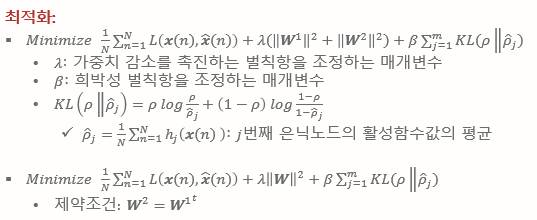

원리

    - 모든 은닉층의 node가 모두 사용되게 하지 않고 dropout과 비슷함
    - overfitting을 줄이기 위해 auto encoder로 pre-training을 시키는데
      이렇게 dropout을 사용할 수도 있음 (generalization)
      
generalization 기법

    - online 알고리즘
    - dropout, batch normalization
    - mini batch -> 일정 size에 만족할 떄까지 data를 채워서 분석을 한다.
      (outlier에도 민감하지 않고 generalization에도 좋다)
      (이유는 더 찾아서 공부해보기)

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        01-3. Denoising Autoencoder

차이

    auto encoder : input과 output이 같도록 학습망을 훈련시킨 후 차이 분석
    denoising : input에 noise를 더한 후 원래 데이터가 output으로 나오게
    
방법

    - Gaussian noise
    - Masking noise : x의 일부 원소를 임의로 해당 변수의 최솟값 또는 최댓값
                      으로 만드는 방법
    - Salt-and-pepper noise : x의 일부 원소를 0으로 만드는 방법
    
원리

    - 관측값에 노이즈를 주고 학습함으로써 모형이 Robust 해짐
    (ex) 시시각각 변종되는 악성코드를 막을 떄 denoising encoder로
         pre-training하여 방어율을 높일 수 있다. (애초에 잡읍 데이터로 훈련)

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        01-4. Variational Autoencoder (bayesian의 원리)

VAEs (변분 오토인코더)

    - VAEs are probabilistic AEs
    - VAEs are generative AEs
    - data vector(h1,...,hn)가 다변량 정규분포를 따르게끔 학습을 시키는 방법
      (hidden layer에서 학습 중에 있는 x의 분포를 알기 때문에 분포가 같은
      x 데이터를 만드는 것)
      
    
    
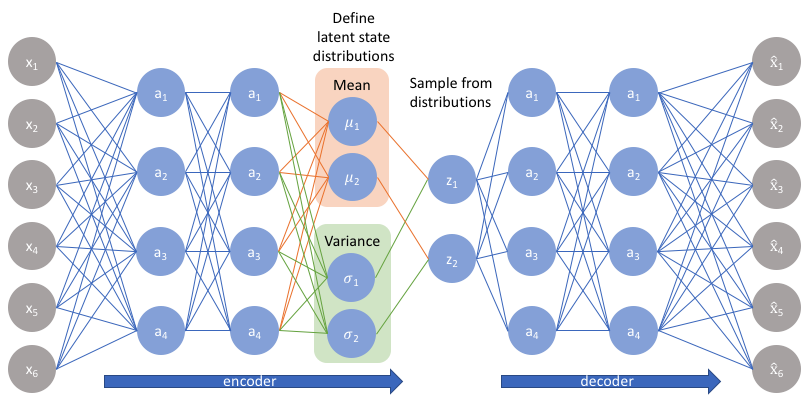

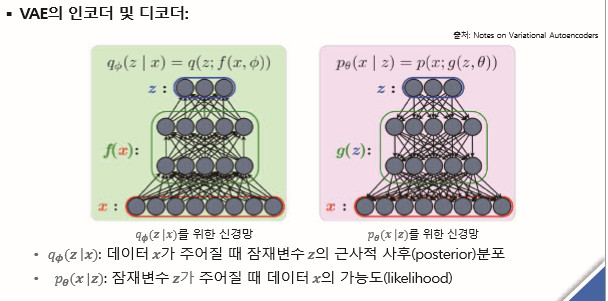


MLE 더 공부하기

    수식에 나오는 θ, ϕ는 각각 p(z|x), q(z|x)의 parameter

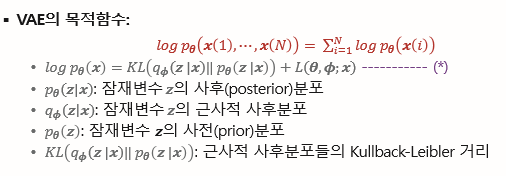

    log p0는 log likely hood로써 '-'를 붙이면 minimize하겠다는 뜻
    -> 오차를 minimize할 떄 사용하는 cross entropy와 이어진다
    모수를 추정할 때에는 '+'를 붙여줌으로써 maximize한다.
    
#### KL의 증명은 p.1274

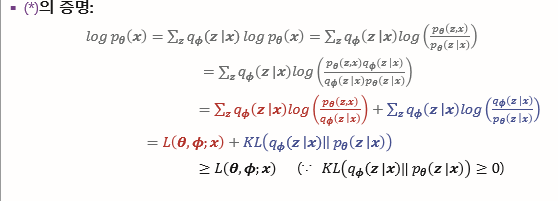

$$ y = f(x_1, x_2, ..., x_k) + e $$

    MLE는 log p0(x)의 sum을 maximize하는 것인데 실제로 log p0(x)는
    모집단의 수라 계산이 불가능하기 때문에 L(theta, pi; x)를 최대화하는
    방법으로 모수를 추정함
    
KL Distance 계산:

$$ -KL(q_{\phi}(z|x(i))||p_0 (z)) = \frac{1}{2} \sum_{j=1}^J (1+log(\sigma_j^2) - (\mu_j^2) - (\sigma_j^2) $$

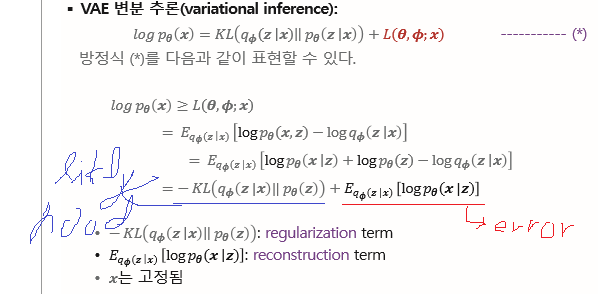

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        02-1. Vanilla GAN

### 필기한거 참조하기 1280~

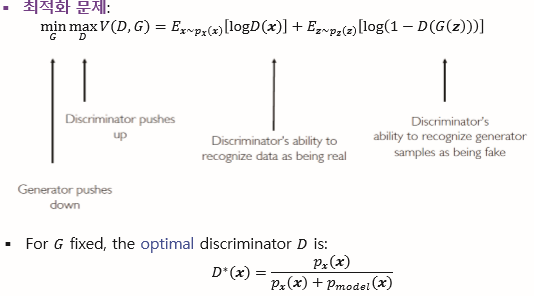

기본 GAN의 문제점

    - 비수렴성 : 경사 하강법은 convex 문제에 대해서만 Nash 균형 보장
                신경망의 매개변수들은 진동하고 불안정하며 수렴되지 않음
    - 모드 붕괴(mode collapse) : 손실함수가 없다. 
                                즉, 다른 이미지를 만들어야 하는데 같은
                                이미지를 계속 만듬
    - 기울기 소멸 문제 : 판별자가 너무 성공적이어서 생성자의 기울기가 소멸
                      -> 학습이 이루어지지 않음
    - 생성자와 판별자 사이의 불균형은 과적합을 일으킴
    - GAN은 hyperparameter의 선택에 매우 민감

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        02-2. LSGAN

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        02-3. DCGAN(Deep Convolutional GAN)

fractional-strided convolution p.1286

https://zzsza.github.io/data/2018/02/23/introduction-convolution/ 참고

    이미지의 size를 줄이려고만 했으나, 이미지를 확장시키는 방법도 있음
    augmentation이 약간 비슷한 방법

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module7

    -Part 07. 비지도학습 개요
    
        02-4. Cycle GAN

### VAE

In [ ]:
"""
https://jmetzen.github.io/2015-11-27/vae.html
예제4: VAE
참고문헌: Auto-Encoding Variational Bayes - Kingma and Welling (2013)
"""

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
tf.set_random_seed(0)

# Load MNIST data in a format suited for tensorflow.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
n_samples = mnist.train.num_examples

def xavier_init(fan_in, fan_out, constant=1): 
    """ Xavier initialization of neural network weights"""
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32)

class VAE(object):
    """ Variation Autoencoder (VAE) with an sklearn-like interface implemented using TensorFlow.
    
    This implementation uses probabilistic encoders and decoders using Gaussian 
    distributions and  realized by multi-layer perceptrons. The VAE can be learned
    end-to-end.
    
    See "Auto-Encoding Variational Bayes" by Kingma and Welling for more details.
    """
    def __init__(self, network_architecture, transfer_fct=tf.nn.softplus, 
                 learning_rate=0.001, batch_size=100):
        self.network_architecture = network_architecture
        self.transfer_fct = transfer_fct
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        # tf Graph input
        self.x = tf.placeholder(tf.float32, [None, network_architecture["n_input"]])
        
        # Create autoencoder network
        self._create_network()
        # Define loss function based variational upper-bound and 
        # corresponding optimizer
        self._create_loss_optimizer()
        
        # Initializing the tensor flow variables
        init = tf.global_variables_initializer()

        # Launch the session
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
    
    def _create_network(self):
        # Initialize autoencode network weights and biases
        network_weights = self._initialize_weights(**self.network_architecture)

        # Use recognition network to determine mean and 
        # (log) variance of Gaussian distribution in latent space
        self.z_mean, self.z_log_sigma_sq = \
            self._encoder_network(network_weights["weights_recog"], 
                                      network_weights["biases_recog"])

        # Draw one sample z from Gaussian distribution
        n_z = self.network_architecture["n_z"]
        eps = tf.random_normal((self.batch_size, n_z), 0, 1, dtype=tf.float32)
        # z = mu + sigma*epsilon
        self.z = tf.add(self.z_mean, tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        # Use generator to determine mean of
        # Bernoulli distribution of reconstructed input
        self.x_reconstr_mean = \
            self._decoder_network(network_weights["weights_gener"],
                                    network_weights["biases_gener"])
            
    def _initialize_weights(self, n_hidden_recog_1, n_hidden_recog_2, 
                            n_hidden_gener_1,  n_hidden_gener_2, 
                            n_input, n_z):
        all_weights = dict()
        all_weights['weights_recog'] = {
            'h1': tf.Variable(xavier_init(n_input, n_hidden_recog_1)),
            'h2': tf.Variable(xavier_init(n_hidden_recog_1, n_hidden_recog_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_recog_2, n_z)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_recog_2, n_z))}
        all_weights['biases_recog'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_recog_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_recog_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_z], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_z], dtype=tf.float32))}
        all_weights['weights_gener'] = {
            'h1': tf.Variable(xavier_init(n_z, n_hidden_gener_1)),
            'h2': tf.Variable(xavier_init(n_hidden_gener_1, n_hidden_gener_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_gener_2, n_input)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_gener_2, n_input))}
        all_weights['biases_gener'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_gener_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_gener_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_input], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_input], dtype=tf.float32))}
        return all_weights
            
    def _encoder_network(self, weights, biases):
        # Generate probabilistic encoder (recognition network), which
        # maps inputs onto a normal distribution in latent space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.x, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        z_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                        biases['out_mean'])
        z_log_sigma_sq = \
            tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                   biases['out_log_sigma'])
        return (z_mean, z_log_sigma_sq)

    def _decoder_network(self, weights, biases):
        # Generate probabilistic decoder (decoder network), which
        # maps points in latent space onto a Bernoulli distribution in data space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.z, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        x_reconstr_mean = \
            tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['out_mean']), 
                                 biases['out_mean']))
        return x_reconstr_mean
            
    def _create_loss_optimizer(self):
        # The loss is composed of two terms:
        # 1.) The reconstruction loss (the negative log probability
        #     of the input under the reconstructed Bernoulli distribution 
        #     induced by the decoder in the data space).
        #     This can be interpreted as the number of "nats" required
        #     for reconstructing the input when the activation in latent is given.
        # Adding 1e-10 to avoid evaluation of log(0.0)
        reconstr_loss = \
            -tf.reduce_sum(self.x * tf.log(1e-10 + self.x_reconstr_mean)
                           + (1-self.x) * tf.log(1e-10 + 1 - self.x_reconstr_mean),
                           1)
        # 2.) The latent loss, which is defined as the Kullback Leibler divergence 
        ##    between the distribution in latent space induced by the encoder on 
        #     the data and some prior. This acts as a kind of regularizer.
        #     This can be interpreted as the number of "nats" required
        #     for transmitting the the latent space distribution given
        #     the prior.
        latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq 
                                           - tf.square(self.z_mean) 
                                           - tf.exp(self.z_log_sigma_sq), 1)
        self.cost = tf.reduce_mean(reconstr_loss + latent_loss)   # average over batch
        # Use ADAM optimizer
        self.optimizer = \
            tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
        
    def partial_fit(self, X):
        """Train model based on mini-batch of input data.
        
        Return cost of mini-batch.
        """
        opt, cost = self.sess.run((self.optimizer, self.cost), feed_dict={self.x: X})
        return cost
    
    def transform(self, X):
        """Transform data by mapping it into the latent space."""
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.z_mean, feed_dict={self.x: X})
    
    def generate(self, z_mu=None):
        """ Generate data by sampling from latent space.
        
        If z_mu is not None, data for this point in latent space is
        generated. Otherwise, z_mu is drawn from prior in latent 
        space.        
        """
        if z_mu is None:
            z_mu = np.random.normal(size=self.network_architecture["n_z"])
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.z: z_mu})
    
    def reconstruct(self, X):
        """ Use VAE to reconstruct given data. """
        return self.sess.run(self.x_reconstr_mean, feed_dict={self.x: X})
        
#We can now define a simple fuction which trains the VAE using mini-batches:        
def train(network_architecture, learning_rate=0.001,
          batch_size=100, training_epochs=10, display_step=5):
    vae = VAE(network_architecture, 
                                 learning_rate=learning_rate, 
                                 batch_size=batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, _ = mnist.train.next_batch(batch_size)

            # Fit training using batch data
            cost = vae.partial_fit(batch_xs)
            # Compute average loss
            avg_cost += cost / n_samples * batch_size

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(avg_cost))
    return vae

#We can now train a VAE on MNIST by just specifying the network topology. 
#We start with training a VAE with a 20-dimensional latent space.
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=20)  # dimensionality of latent space

vae = train(network_architecture, training_epochs=36)

#Based on this we can sample some test inputs and visualize 
#how well the VAE can reconstruct those. In general the VAE does really well.
x_sample = mnist.test.next_batch(100)[0]
x_reconstruct = vae.reconstruct(x_sample)

plt.figure(figsize=(8, 12))
for i in range(5):

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

#=========== Illustrating latent space ===============#
#Next, we train a VAE with 2d latent space and illustrates 
#how the encoder (the recognition network) encodes some of 
#the labeled inputs (collapsing the Gaussian distribution 
#in latent space to its mean). This gives us some insights into 
#the structure of the learned manifold (latent space)
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=2)  # dimensionality of latent space

vae_2d = train(network_architecture, training_epochs=36)

x_sample, y_sample = mnist.test.next_batch(5000)
z_mu = vae_2d.transform(x_sample)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(y_sample, 1))
plt.colorbar()
plt.grid()

nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*vae.batch_size)
        x_mean = vae_2d.generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

#An other way of getting insights into the latent space is to use 
#the generator network to plot reconstrunctions at the positions 
#in the latent space for which they have been generated:
plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper", cmap="gray")
plt.tight_layout()

### Cycle GAN

https://www.youtube.com/watch?v=Fkqf3dS9Cqw

In [ ]:
#============================================================#
# 예제 8: 인물 이미지 변형을 위한 CycleGAN 구현
#============================================================#

"""
이 예제에서 사용하는 이미지 데이터는 DCGAN에서 사용한 인물 흑백 이미지 20장이다. 
20장 중 10장은 정상 이미지 x(도메인 A), 10장은 회전한 이미지로 변형하여 y(도메인 B)로 사용한다. 
도메인 A에 속하는 이미지를 입력하면 회전한 이미지로 변형하고, 도메인 B에 속하는 
회전한 이미지를 입력하면 정상 이미지로 변형하는 CycleGAN을 만드는 것이 목적이다. 
단, 도메인 A에 속하는 이미지를 회전한 이미지가 도메인 B에 존재한다고
확신할 수 없다는 사실에 주의한다.

생성자(G=G_AB, F=G_BA)와 판별자(D_A, D_B)는 입력층, 1개의 은닉층 및 출력층으로
구성된 전방향 신경망이다. 인물 이미지는 45*40 = 1800 픽셀의 이미지이므로 생성자의 출
력층은 1,800개의 출력노드를 가진다. 모든 출력노드에 적용되는 활성함수로 시그모이드 함
수를 사용하고 모든 가중치는 Xavier 초기치를 사용한다.
"""

# 필요한 라이브러리 불러들임 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image as Im
import os
import glob  


# 그래프 리셋
tf.reset_default_graph() 
# 재현성을 위해 시드 지정
tf.set_random_seed(1)

#--------------------------------------------------
# data 불러오기
#--------------------------------------------------
 
#os.chdir('C:/Users/admin/Dropbox/저서/텐서플로_딥러닝/GANs_tensorflow/')
files=glob.glob('./face20/*.png')

img=[]          
for file in files:
    a=Im.open(file) 
    a=a.convert('L') # 흑백화면으로 
    a1=np.array(a)
    img.append(a1)        
    

xr=np.asarray(img)/255. # convert list to array

nr=np.prod(xr.shape[1:3]) # 45*40=1800
Xr=np.reshape(xr,[len(img),nr]) #=[20,1800]


import scipy.ndimage.interpolation
# Real image
X_rA = Xr[:10]
# Rotated image
X_rB = Xr[10:].reshape(-1, 45, 40)
X_rB = scipy.ndimage.interpolation.rotate(X_rB, 90, axes=(1, 2))
X_rB = X_rB.reshape(-1, 45*40)

# divide to train and test
XA=X_rA[0:2,:]
X_trainA=X_rA[2:10,:]
XB=X_rB[0:2,:]
X_trainB=X_rB[2:10,:]

# 훈련용과 시험용 이미지 개수와 입력 변수의 수
sample_size= X_trainA.shape[0] #8 
sample_size_test= XA.shape[0] #2 
X_dim = X_trainA.shape[1] #=1800
#-------------------------------------------
# 매개변수 설정
#-------------------------------------------
# 생성자의 두 은닉층 크기: 128
# 비판자의 두 은닉층 크기: 128
# 미니배치 크기: 20
# 반복 수: 300
# 학습률 : 0.001

learning_rate = 0.001
batch_size = 2
epochs =600 # no. of epochs
h_dim = 128

# 입력 이미지 placeholder
X_A = tf.placeholder(tf.float32, shape=[None, X_dim])
X_B = tf.placeholder(tf.float32, shape=[None, X_dim])


# 판별자의 가중치와 편의(# 사비에르 초기치 사용)
D_A_W1 = tf.get_variable('D_A_W1',shape=[X_dim, h_dim],initializer=tf.contrib.layers.xavier_initializer())
D_A_b1 = tf.Variable(tf.zeros([h_dim]))
D_A_W2 = tf.get_variable('D_A_W2', shape=[h_dim, 1],initializer=tf.contrib.layers.xavier_initializer())
D_A_b2 = tf.Variable(tf.zeros([1]))

D_B_W1 = tf.get_variable('D_B_W1', shape=[X_dim, h_dim],initializer=tf.contrib.layers.xavier_initializer())
D_B_b1 = tf.Variable(tf.zeros(shape=[h_dim]))
D_B_W2 = tf.get_variable('D_B_W2', shape=[h_dim, 1],initializer=tf.contrib.layers.xavier_initializer())
D_B_b2 = tf.Variable(tf.zeros([1]))

# 생성자의 가중치와 편의(# 사비에르 초기치 사용)
G_AB_W1 = tf.get_variable('D_AB_W1', shape=[X_dim, h_dim],initializer=tf.contrib.layers.xavier_initializer())
G_AB_b1 = tf.Variable(tf.zeros([h_dim]))
G_AB_W2 = tf.get_variable('D_AB_W2', shape=[h_dim, X_dim],initializer=tf.contrib.layers.xavier_initializer())
G_AB_b2 = tf.Variable(tf.zeros([X_dim]))

G_BA_W1 = tf.get_variable('D_BA_W1', shape=[X_dim, h_dim],initializer=tf.contrib.layers.xavier_initializer())
G_BA_b1 = tf.Variable(tf.zeros([h_dim]))
G_BA_W2 = tf.get_variable('D_BA_W2', shape=[h_dim, X_dim],initializer=tf.contrib.layers.xavier_initializer())
G_BA_b2 = tf.Variable(tf.zeros([X_dim]))


# 모수 모음
theta_DA = [D_A_W1, D_A_W2, D_A_b1, D_A_b2]
theta_DB= [ D_B_W1, D_B_W2, D_B_b1, D_B_b2]
theta_G = [G_AB_W1, G_AB_W2, G_AB_b1, G_AB_b2,
           G_BA_W1, G_BA_W2, G_BA_b1, G_BA_b2]

#------------------------------------------------
# 생성자 정의:
#------------------------------------------------
def G_AB(X):
    h1 = tf.nn.relu(tf.matmul(X, G_AB_W1) + G_AB_b1)
    return tf.nn.sigmoid(tf.matmul(h1, G_AB_W2) + G_AB_b2)


def G_BA(X):
    h1 = tf.nn.relu(tf.matmul(X, G_BA_W1) + G_BA_b1)
    return tf.nn.sigmoid(tf.matmul(h1, G_BA_W2) + G_BA_b2)

#------------------------------------------------
# 판별자 정의:
#------------------------------------------------
def D_A(X):
    h1 = tf.nn.relu(tf.matmul(X, D_A_W1) + D_A_b1)
    return tf.nn.sigmoid(tf.matmul(h1, D_A_W2) + D_A_b2)


def D_B(X):
    h1 = tf.nn.relu(tf.matmul(X, D_B_W1) + D_B_b1)
    return tf.nn.sigmoid(tf.matmul(h1, D_B_W2) + D_B_b2)



# 생성(변형)결과 
X_AB = G_AB(X_A)
X_BA = G_BA(X_B)


# 판별자 D_A 결과 
D_A_real = D_A(X_A)
D_A_fake = D_A(X_BA)

# 판별자 D_B 결과
D_B_real = D_B(X_B)
D_B_fake = D_B(X_AB)

# 복원( x -> G(x)-> F(G(x)-> x))
X_ABA = G_BA(X_AB)

# 복원( y -> F(x)-> G(F(x)-> y))
X_BAB = G_AB(X_BA)


# 판별자 비용함수 (LSGAN 적용)
DA_loss = 0.5 * (tf.reduce_mean((D_A_real - 1)**2)+ 0.5*tf.reduce_mean(D_A_fake**2))
DB_loss = 0.5 * (tf.reduce_mean((D_B_real - 1)**2)+ 0.5*tf.reduce_mean(D_B_fake**2))

# 생성자 비용함수
GAB_loss = 0.5 * tf.reduce_mean((D_A_fake - 1)**2)+0.5 * tf.reduce_mean((D_B_fake - 1)**2)

# 복원에 대한 비용함수
C_loss=tf.reduce_mean(tf.abs(X_A-X_ABA))+tf.reduce_mean(tf.abs(X_B-X_BAB))
G_loss=GAB_loss+C_loss


# Optimizer
DA_solver = tf.train.AdamOptimizer(learning_rate).minimize(DA_loss, var_list=theta_DA)
DB_solver = tf.train.AdamOptimizer(learning_rate).minimize(DB_loss, var_list=theta_DB)
G_solver = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=theta_G)


#------------------------------------------------
# 텐서플로 그래프 생성 및 학습 
#------------------------------------------------
sess=tf.Session(); 
sess.run(tf.global_variables_initializer())
losses = []
for epoch in range(epochs):
    total_batch=int(sample_size/batch_size)
    avg_loss=0
    for ii in range(total_batch):
        if ii!=total_batch:
              XrA=X_trainA[ii*batch_size:(ii+1)*batch_size]
              XrB=X_trainB[ii*batch_size:(ii+1)*batch_size]
        else:
              XrA=X_trainA[(ii+1)*batch_size:]           
              XrB=X_trainB[(ii+1)*batch_size:]         
        DA_loss_curr,_ = sess.run([DA_loss,DA_solver], feed_dict={X_A: XrA, X_B: XrB})
        DB_loss_curr,_ = sess.run([DB_loss,DB_solver], feed_dict={X_A: XrA, X_B: XrB})
        G_loss_curr,_ = sess.run([G_loss,G_solver], feed_dict={X_A: XrA, X_B: XrB})    
        losss=DA_loss_curr+DB_loss_curr+G_loss_curr
        avg_loss+=losss/total_batch
    print('Epoch: %d' %(epoch+1),'DiscriminatorA Loss= %f,DiscriminatorB Loss= %f, Generator Loss= %f, Avg Loss=%f' %(DA_loss_curr, DB_loss_curr,G_loss_curr, avg_loss))   
    losses.append((DA_loss_curr, DB_loss_curr,G_loss_curr,avg_loss))
    # 100 에폭마다 변형되는 이미지 그림
    if (epoch+1)%100==0:  
        samples_A = sess.run(X_BA, feed_dict={X_B: XB})
        samples_B = sess.run(X_AB, feed_dict={X_A: XA})
        # 도메인  A의 test 이미지
        f,axes =plt.subplots(figsize=(7,7), nrows=1, ncols=2, sharey=True, sharex=True)
        for ii in range(2):
            plt.subplot(1,2,ii+1); plt.suptitle('Domain A') 
            plt.imshow(XA[ii].reshape(45,40),'Greys_r')
        # G_AB(X_A) 결과               
        f,axes =plt.subplots(figsize=(7,7), nrows=1, ncols=2, sharey=True, sharex=True)      
        for ii in range(2):
            plt.subplot(1,2,ii+1); plt.suptitle('Result of G_AB') 
            plt.imshow(samples_B[ii].reshape(40,45),'Greys_r')
        # 도메인  B의 test 이미지
        f,axes =plt.subplots(figsize=(7,7), nrows=1, ncols=2, sharey=True, sharex=True)
        f.suptitle(epoch+1)
        f.tight_layout()
        for ii in range(2):
            plt.subplot(1,2,ii+1);plt.suptitle('Domain B') 
            plt.imshow(XB[ii].reshape(40,45),'Greys_r')
        # G_BA(X_B) 결과          
        f,axes =plt.subplots(figsize=(7,7), nrows=1, ncols=2, sharey=True, sharex=True)     
        for ii in range(2):
            plt.subplot(1,2,ii+1);plt.suptitle('Result of G_BA') 
            plt.imshow(samples_A[ii].reshape(45,40),'Greys_r')  
                
        
# 판별자, 생성자의 비용함수 그림 
fig, ax = plt.subplots(figsize=(7,7))
losses = np.array(losses)
plt.plot(losses.T[0], label='DiscriminatorA')
plt.plot(losses.T[1], label='DiscriminatorB')
plt.plot(losses.T[2], label='Generator')
plt.title("Training Losses")
plt.legend()


# 도메인 A 에 속하는 이미지
f,axes =plt.subplots(figsize=(7,7), nrows=2, ncols=4, sharey=True, sharex=True)
f.tight_layout()
for ii in range(8):
    plt.subplot(2,4,ii+1); f.suptitle('Domain A')
    plt.imshow(X_trainA[ii].reshape(45,40),'Greys_r')

# 도메인 B 에 속하는 이미지    
f,axes =plt.subplots(figsize=(7,7), nrows=2, ncols=4, sharey=True, sharex=True)
for ii in range(8):
    plt.subplot(2,4,ii+1); f.suptitle('Domain B') 
    plt.imshow(X_trainB[ii].reshape(40,45),'Greys_r')
